### Sales Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
!pip install pyarrow

In [98]:
sales_data = pd.read_feather(r"/Users/akhilkumarkolli/Sales_data/sales_data.ftr")

### 1. Data Preprocessing

In [99]:
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [100]:
sales_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [101]:
sales_data = sales_data.dropna(how='all')

In [102]:
sales_data.shape

(186305, 6)

In [103]:
sales_data.duplicated()

0         False
2         False
3         False
4         False
5         False
          ...  
186845    False
186846    False
186847    False
186848    False
186849    False
Length: 186305, dtype: bool

In [104]:
sales_data[sales_data.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1302,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1684,178158,USB-C Charging Cable,1,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186738,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186782,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"


In [105]:
sales_data = sales_data.drop_duplicates()

In [106]:
sales_data.shape

(185687, 6)

In [107]:
sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### 2. best Month for sales

In [108]:
date = sales_data['Order Date'][0]

In [109]:
date.split(' ')[0].split("/")[0]

'04'

In [110]:
sales_data['Order Date'][0].split("/")[0]

'04'

In [111]:
def return_month(x):
    return x.split("/")[0]

In [112]:
sales_data['month'] = sales_data['Order Date'].apply(return_month)

In [113]:
filter1= sales_data['month']== 'Order Date'

In [114]:
sales_data = sales_data[~filter1]

In [115]:
sales_data['month'] = sales_data['month'].astype(int)

/var/folders/nf/jyh9wrds77jbcj7h60009_nw0000gn/T/ipykernel_9568/3616305142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['month'] = sales_data['month'].astype(int)


In [120]:
sales_data['Quantity Ordered']= sales_data['Quantity Ordered'].astype(int)
sales_data['Price Each'] = sales_data['Price Each'].astype(float)

/var/folders/nf/jyh9wrds77jbcj7h60009_nw0000gn/T/ipykernel_9568/3288205006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['Quantity Ordered']= sales_data['Quantity Ordered'].astype(int)
/var/folders/nf/jyh9wrds77jbcj7h60009_nw0000gn/T/ipykernel_9568/3288205006.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['Price Each'] = sales_data['Price Each'].astype(float)


In [121]:
sales_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
month                 int64
dtype: object

In [122]:
sales_data['sales'] = sales_data['Quantity Ordered'] * sales_data['Price Each']

/var/folders/nf/jyh9wrds77jbcj7h60009_nw0000gn/T/ipykernel_9568/1671460394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['sales'] = sales_data['Quantity Ordered'] * sales_data['Price Each']


In [123]:
sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


In [128]:
sales_data.groupby(['month'])['sales'].sum()

month
1     1821413.16
2     2200078.08
3     2804973.35
4     3389217.98
5     3150616.23
6     2576280.15
7     2646461.32
8     2241083.37
9     2094465.69
10    3734777.86
11    3197875.05
12    4608295.70
Name: sales, dtype: float64

<Axes: xlabel='month'>

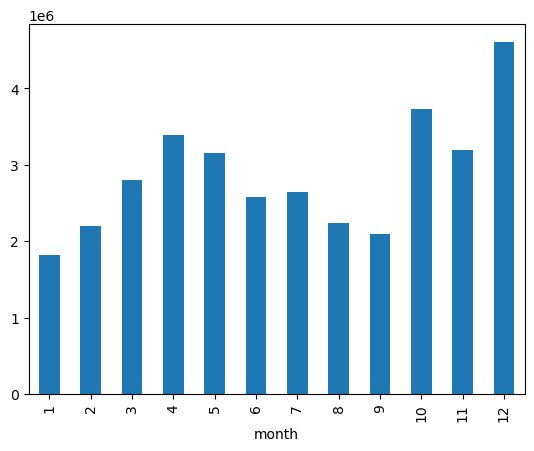

In [135]:
sales_data.groupby(['month'])['sales'].sum().plot(kind = 'bar')

### Conclusion: By seeing the graph we can come to a conclusion that the sales are higher in the month of Decemeber

### 3. Which City has maximum orders

In [142]:
address = sales_data['Purchase Address'][0].split(',')

In [144]:
city = address[1]

' Dallas'

In [150]:
def city(x):
    return x.split(',')[1]

In [151]:
sales_data["city"] =  sales_data['Purchase Address'].apply(city)

/var/folders/nf/jyh9wrds77jbcj7h60009_nw0000gn/T/ipykernel_9568/1148442018.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data["city"] =  sales_data['Purchase Address'].apply(city)


In [158]:
city_sales_data = sales_data.groupby(['city'])['Quantity Ordered'].sum()

<Axes: xlabel='city'>

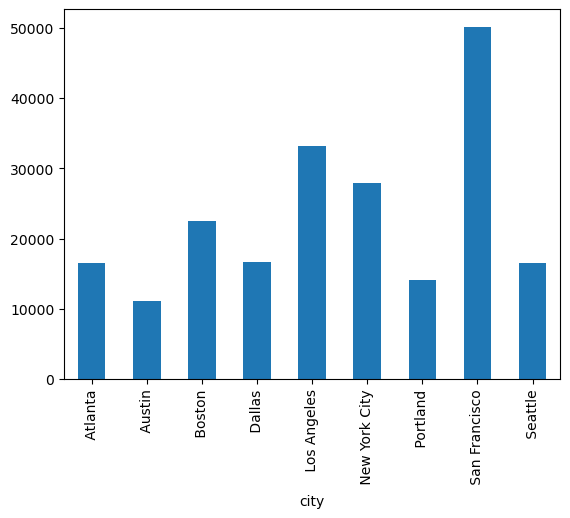

In [162]:
city_sales_data.plot(kind= 'bar')

### Conclusion : By looking at the graph it is clearly visible that city San Fransicso is having high orders when comapred to other states.

### 4. What product sold the most and why?

In [191]:
sales_products = sales_data.groupby(['Product']) ['Quantity Ordered'].sum()

In [193]:
sales_products = pd.DataFrame(sales_products)

In [202]:
sales_products['price'] = sales_data.groupby(['Product'])['Price Each'].unique()

In [208]:
sales_products['price']= sales_products['price'].astype(int)

In [223]:
sales_products = sales_products.reset_index()

In [232]:
products  = sales_products['Product'].values

/var/folders/nf/jyh9wrds77jbcj7h60009_nw0000gn/T/ipykernel_9568/620833121.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products, rotation = 'vertical')


[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

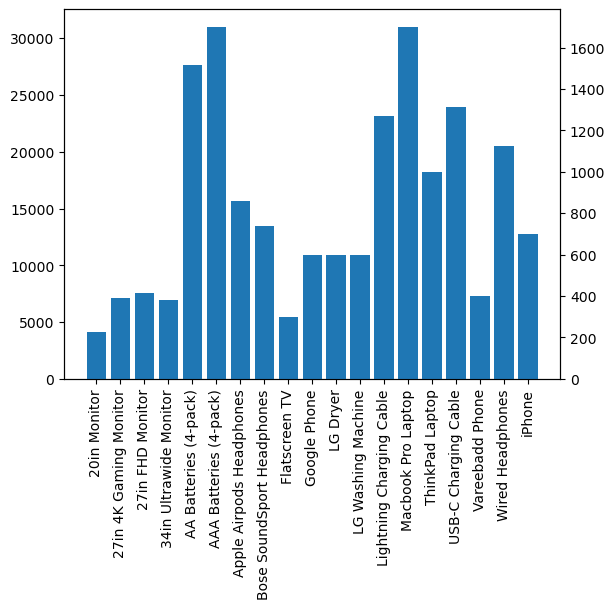

In [234]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar(sales_products['Product'],sales_products['Quantity Ordered'])
ax2.bar(sales_products['Product'],sales_products['price'])
ax1.set_xticklabels(products, rotation = 'vertical')

### Conclusion : By looking at the above graph it is evident that AA batteries and AAA batteries are selling in higher qunatity as the price is low

### 5. understanding the trend of most sold products

In [245]:
most_sold_products = sales_data['Product'].value_counts()[0:5].index

In [247]:
filter2 = sales_data['Product'].isin(most_sold_products)

In [253]:
most_sold_products = sales_data[filter2]

In [258]:
sales_pivot = most_sold_products.groupby(['month', 'Product']).size().unstack()

<Axes: title={'center': 'Line chart of top 5 selling products'}, xlabel='month'>

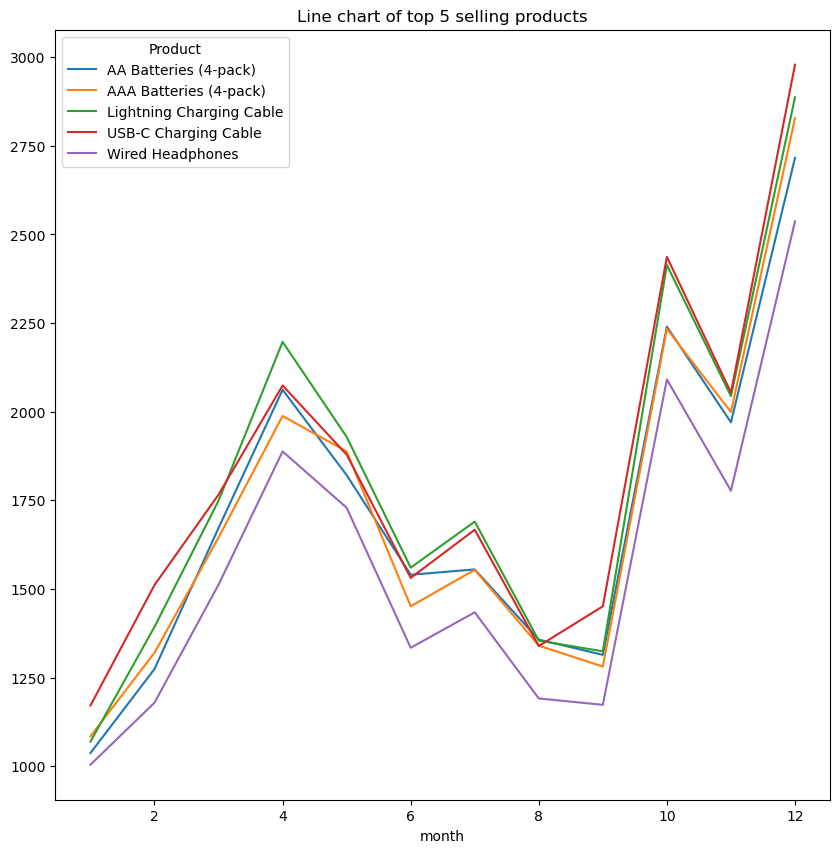

In [263]:

sales_pivot.plot(figsize = (10,10),title = "Line chart of top 5 selling products")

### Analysing products which are sold together

In [307]:
filter3 = sales_data['Order ID'].duplicated(keep=False)

In [308]:
filtered_data = sales_data[filter3]

In [309]:
grouped_products = filtered_data.groupby(['Order ID']) ['Product'].apply(lambda x : ','.join(x)).reset_index()

In [318]:
filtered_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'month', 'sales', 'city', 'grouped_products'],
      dtype='object')

In [321]:
grouped_products.rename(columns = {'Product' : 'grouped_products'})

,Order ID,grouped_products
0,141275,"USB-C Charging Cable,Wired Headphones"
1,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
2,141365,"Vareebadd Phone,Wired Headphones"
3,141384,"Google Phone,USB-C Charging Cable"
4,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
6874,319536,"Macbook Pro Laptop,Wired Headphones"
6875,319556,"Google Phone,Wired Headphones"
6876,319584,"iPhone,Wired Headphones"
6877,319596,"iPhone,Lightning Charging Cable"


In [325]:
prod_grp = filtered_data.merge(grouped_products , how = "left", on = 'Order ID')
prod_grp.columns

Index(['Order ID', 'Product_x', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'month', 'sales', 'city', 'grouped_products',
       'Product_y'],
      dtype='object')

In [326]:
del prod_grp['grouped_products']

In [331]:
prod_grp = prod_grp.rename(columns = {'Product_y': 'grouped_products'})

In [332]:
prod_grp

,Order ID,Product_x,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,grouped_products
0,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,Wired Headphones"
1,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,"Google Phone,Wired Headphones"
2,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,USB-C Charging Cable"
3,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,"Google Phone,USB-C Charging Cable"
4,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,"AAA Batteries (4-pack),Google Phone"
...,...,...,...,...,...,...,...,...,...,...
14123,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta,"34in Ultrawide Monitor,AA Batteries (4-pack)"
14124,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta,"Wired Headphones,AAA Batteries (4-pack)"
14125,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta,"Wired Headphones,AAA Batteries (4-pack)"
14126,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco,"Google Phone,USB-C Charging Cable"


In [356]:
assott_data = prod_grp.drop_duplicates(subset =["Order ID"])


In [359]:
grp_assott_data = assott_data["grouped_products"].value_counts()

In [364]:
head_assott_data = grp_assott_data.head(5)
head_assott_data

grouped_products
iPhone,Lightning Charging Cable         886
Google Phone,USB-C Charging Cable       857
iPhone,Wired Headphones                 361
Vareebadd Phone,USB-C Charging Cable    312
Google Phone,Wired Headphones           303
Name: count, dtype: int64

<Axes: title={'center': 'Most sold combination of products'}, ylabel='count'>

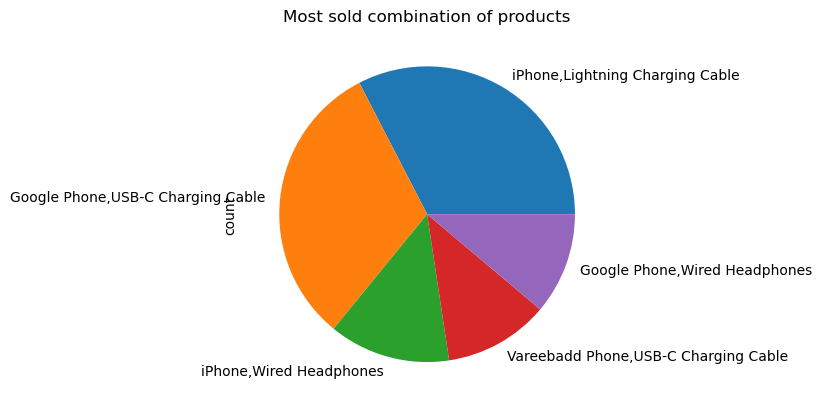

In [363]:
head_assott_data.plot(kind = "pie", title ="Most sold combination of products")

### From the above graph it is clear that the iPhone,Lightning Charging Cable ,Google Phone,USB-C Charging Cable are the most brought combinations.